In [67]:
# netowrks
import networkx as nx
import igraph as ig

# data processing
import pandas
import numpy as np
import scipy.sparse as ss

#some functions to make our lifes easier
import sys
sys.path.append("./")
from common_functions import *

# viz
import pylab as plt
import seaborn as sns
import matplotlib as mpl
%matplotlib inline

#Change the default options of visualization (improving the defaults)
custom_params = {"axes.spines.right": False, "axes.spines.top": False, "axes.spines.left": False, "axes.spines.bottom":
False,"lines.linewidth": 2, "grid.color": "lightgray", "legend.frameon": False, "xtick.labelcolor": "#484848", "ytick.labelcolor":
"#484848", "xtick.color": "#484848", "ytick.color": "#484848","text.color": "#484848", "axes.labelcolor": "#484848",
"axes.titlecolor":"#484848","figure.figsize": [5,3],
"axes.titlelocation":"left","xaxis.labellocation":"left","yaxis.labellocation":"bottom"}
palette = ["#3d348b","#e6af2e","#191716","#e0e2db"] #use your favourite colours
sns.set_theme(context='paper', style='white', palette=palette, font='Verdana', font_scale=1.3, color_codes=True,
rc=custom_params)

from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [2]:
def plot_network(G, a0 = None, values = None):
    if values is None:
        values = nx.degree_centrality(G).values()
    
    norm = mpl.colors.Normalize(vmin=min(values), vmax=max(values), clip=True)
    mapper = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.coolwarm)


    # NEtwork
    if nx.is_bipartite(G):
        top = [_ for _ in G.nodes() if _[0] != "S"]
        pos = nx.bipartite_layout(G, top)
        node_color = ["#e6af2e" if node in top else "#e0e2db" for node in G]
    else:
        pos = nx.spring_layout(G, seed = 1)
        node_color = [mapper.to_rgba(i) for i in values]

    nx.draw(G, pos = pos, with_labels = True, node_size=500*np.array(list(values)), edge_color = "darkgray", 
           node_color = node_color, ax = a0)
    
    
def plot_network_adj(G, values = None):
    """
    Plots the graph (with color/node size adjusted according to values) and the adjacency matrix
    """
    f, (a0, a1, a2) = plt.subplots(1, 3, gridspec_kw={'width_ratios': [1, 1, 0.5]}, figsize=(12,4))
    
    plot_network(G, a0, values = values)
    
    # Adjacency
    df = nx.to_pandas_adjacency(G, nodelist=list(G.nodes()), dtype=int)
    plot_table(a1, df.values, df.index, df.columns)

    A = nx.to_scipy_sparse_array(G, nodelist=list(G.nodes()), weight=1)
    N = len(G.nodes())
    a2.spy(A)
    sns.despine(bottom="True", left=True)
    plt.grid(True)
    #2add the right 
    a2.set_xticks(range(N), G.nodes(), rotation=90)
    a2.set_yticks(range(N), G.nodes())
    plt.tight_layout()

def plot_table(a1, cellText, rowLabels, colLabels):
    cellText = pd.DataFrame(cellText)
    the_table = a1.table(cellText=cellText.values, rowLabels=rowLabels, colLabels=colLabels, loc='center', colLoc = "left", cellColours=(cellText>0).replace({False: "white", True:"#e6af2e"}).values)
    a1.axis(False) 
    the_table.scale(0.8, 1.6)

    
def adj_to_net(A, d_names = {0: "Alice", 1: "Bob", 2: "John", 3:"Amy", 4:"Mike", 5:"Rose"}):
    G = nx.from_numpy_array(A, create_using=nx.DiGraph())
    G = nx.relabel_nodes(G, d_names)
    return G

def normalize_by_row(A):
    S = 1/A.sum(axis=1)
    Q = ss.csr_array(ss.spdiags(S.T, 0, *A.shape))
    return (Q @ A)


# Create example networks and visualize them
- Node the create_using parameter

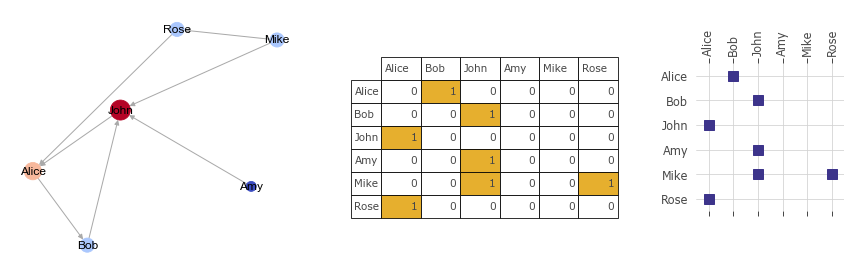

In [3]:
# Small directed network to understand matrix multiplication
G_dir = nx.from_edgelist([
    ("Alice", "Bob"),
        ("John", "Alice"),
    ("Bob", "John"),
    ("Amy", "John"),
    ("Mike", "John"),
    ("Rose", "Alice"),
    ("Mike", "Rose")
], create_using=nx.DiGraph())

plot_network_adj(G_dir)



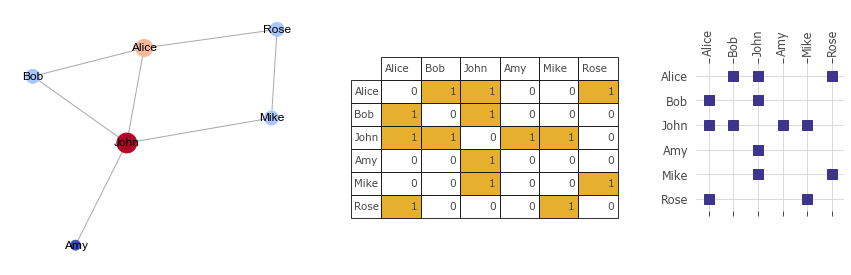

In [4]:

# Small undirected network
G_undir = nx.from_edgelist([
    ("Alice", "Bob"),
    ("John", "Alice"),
    ("Bob", "John"),
    ("Amy", "John"),
    ("Mike", "John"),
    ("Rose", "Alice"),
    ("Mike", "Rose")
], create_using=nx.Graph())


plot_network_adj(G_undir)

In [5]:
# Create some metadata
df = pd.DataFrame([["Alice",10],
                  ["Bob",5],
                  ["John",5],
                  ["Amy",1],
                  ["Mike",10],
                  ["Rose",100]], columns=["Person","Income"])

df

,Person,Income
0,Alice,10
1,Bob,5
2,John,5
3,Amy,1
4,Mike,10
5,Rose,100


# Exercise 1



## 1.1 Convert the directed network 
- numpy_array
- scipy_sparse_array
- pandas_adjacency
- pandas_edgelist

What are the advantages of each?


In [6]:
## 1.1 Convert the directed network
#Example: A = nx.to_scipy_sparse_array(G_dir, nodelist=list(G_dir.nodes()), weight=1)

### 1.2 Use plt.spy() to visualize the scipy_sparse_array

In [7]:
# plt.spy()

## 1.3 Create a network object from the pandas adjacency matrix

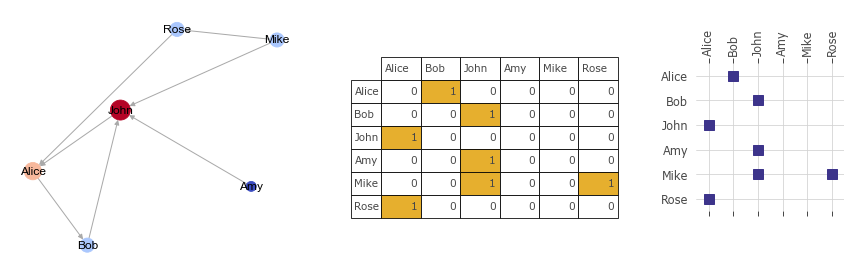

In [9]:
# Convert to graph
A = nx.to_scipy_sparse_array(G_dir, nodelist=list(G_dir.nodes()), weight=1)
G = nx.from_numpy_array(A, create_using=nx.DiGraph())
d_names = {i: node for i,node in enumerate(G_dir.nodes())}
G = nx.relabel_nodes(G, d_names) #add back labels (lost during the conversion)
plot_network_adj(G)

#I packed this in G = adj_to_net(A, d_names)

# Exercise 2
What is the average income of the neighbors?

In python
* Matrix multiplication (dot-product) is done using "@" (e.g. A @ B)
    * The number of columns of A needs to match the number of rows of B!
* Element-wise multiplication is done using "*" (e.g. A*B multiplies the element i,j of A with the element i,j of B)
    * If B is an array, the dimensions need to match those of A
    * If B is a vector, it multiplies it row-wise (the number of rows of A need to match the number of elements of B)

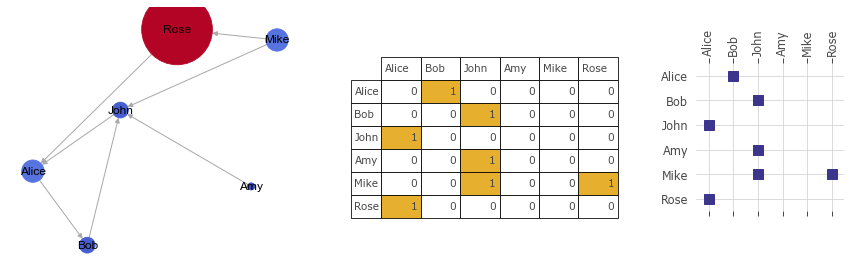

In [10]:
# Original network adding the income as a color/size
plot_network_adj(G, values = df["Income"]/10)

[36.66666667  7.5         6.5         5.         52.5        10.        ]


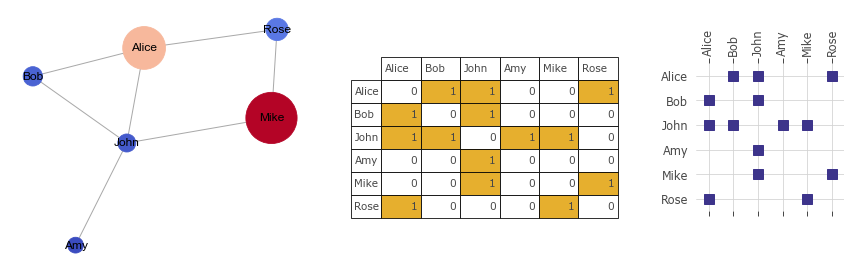

In [11]:
# adjacency array
A = nx.to_scipy_sparse_array(G_undir)

# Calculate sum of neighbors income
sum_income = A @ df["Income"]

# Divide by number of neighbors to get an average
sum_income = sum_income / A.sum(1)

print(sum_income)
plot_network_adj(G_undir, values=sum_income/10)

# Exercise 3: Matrix multiplication
3a. Interpretation as number of routes
- Number of nodes 2 steps away
- Number of nodes 3 steps away
- Number of triangles directed
- Number of triangles undirected

3b. Number of triangles and clustering

## Exercise 3a: Matrix multiplication and paths

One step away
Two steps away
Three steps away. Triangles!


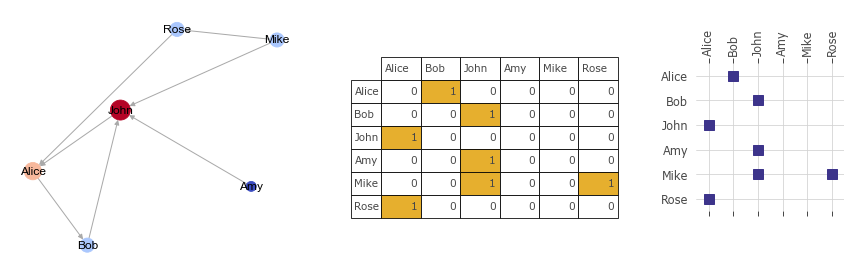

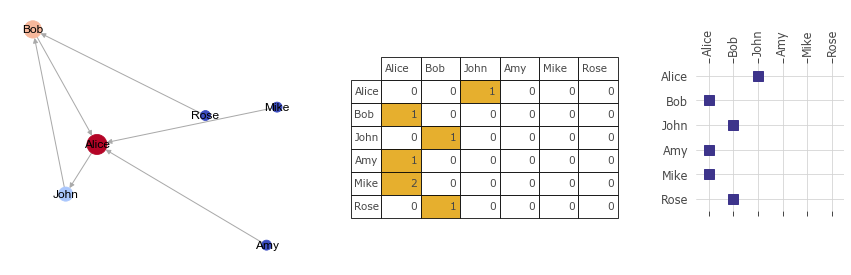

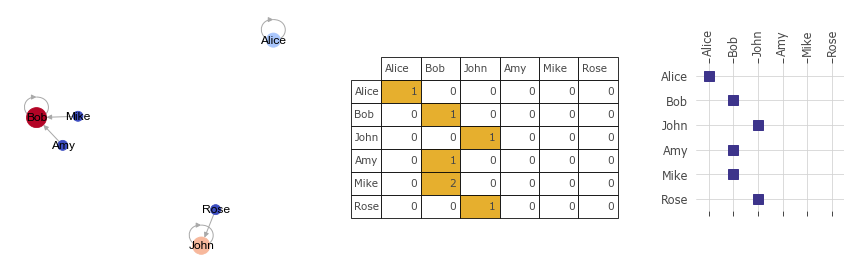

In [12]:
# Number of paths to go from node i to node j in x steps

#x = 1
print("One step away")
plot_network_adj(G_dir)
A = nx.to_scipy_sparse_array(G_dir)

#x = 2
print("Two steps away")
G2 = adj_to_net(A @ A)
plot_network_adj(G2)

#x = 3
print("Three steps away. Triangles!")
G3 = adj_to_net(A @ A @ A)
plot_network_adj(G3)



## Exercise 3b: Number of triangles and clustering

[('Alice', 0.5),
 ('Bob', 0.5),
 ('John', 0.5),
 ('Amy', 0.0),
 ('Mike', 0.0),
 ('Rose', 0.0)]

1.0


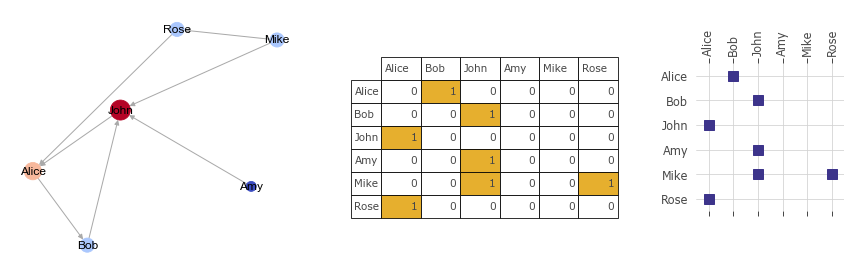

In [13]:
# Count number of triangles in the directed network
plot_network_adj(G_dir)
A = nx.to_scipy_sparse_array(G_dir)
path_3 = A**3


# For undirected newtorks there are two directions
display(list(zip(G_dir.nodes(), path_3.diagonal() / 2)))

# Number of triangles = trace / 3 (each  triangle count in 3 nodes)
print(path_3.trace()/3)

[('Alice', 1.0),
 ('Bob', 1.0),
 ('John', 1.0),
 ('Amy', 0.0),
 ('Mike', 0.0),
 ('Rose', 0.0)]

1.0


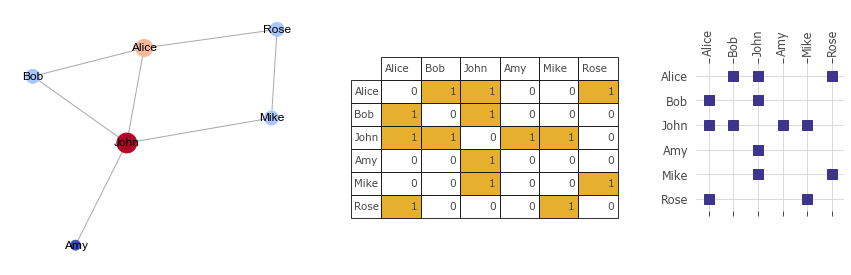

In [121]:
# Count number of triangles in the undirected network
plot_network_adj(G_undir)
A = nx.to_scipy_sparse_array(G_undir)
path_3 = A**3


# For undirected newtorks there are two directions
display(list(zip(G_undir.nodes(), path_3.diagonal() / 2)))

# Number of triangles = trace / 6 (each  triangle count in 3 nodes, each triangle counted in two directions)
print(path_3.trace()/3/2)

In [15]:
#Number of unique people reached in 3 steps (example)
number_people = A**3 + A**2
number_people.setdiag(0) # Remove yourself (in the diagonal)
number_people = number_people>0 #Don't count people many times

number_people.sum(1)

array([5, 5, 5, 5, 5, 5])

In [123]:
#Local clustering = number of triangles / number of potential links
print(nx.clustering(G_undir)) #standard nx function

# Number of triangles
path_3 = (A**3).diagonal()/2 # divided by two because there are two directions

# Number of potential links between neighbors
degree = A.sum(1)
potential_links = (degree*(degree-1)/2)

list(zip(G_undir.nodes(), path_3, potential_links, path_3/potential_links))

{'Alice': 0.3333333333333333, 'Bob': 1.0, 'John': 0.16666666666666666, 'Amy': 0, 'Mike': 0, 'Rose': 0}


/var/folders/hx/nz98f65j615c4ygz7xt694700000gp/T/ipykernel_22363/2639672817.py:11: RuntimeWarning: invalid value encountered in true_divide
  list(zip(G_undir.nodes(), path_3, potential_links, path_3/potential_links))


[('Alice', 1.0, 3.0, 0.3333333333333333),
 ('Bob', 1.0, 1.0, 1.0),
 ('John', 1.0, 6.0, 0.16666666666666666),
 ('Amy', 0.0, 0.0, nan),
 ('Mike', 0.0, 1.0, 0.0),
 ('Rose', 0.0, 1.0, 0.0)]

---

# Exercise 4
Based on the arrays below (A_classmates = projected network of schoolmates, A_parents = student to parent network, A_parents_income = income of the parents):
- Calculate the income of your parents
- Calculate the income of the parents of your classmates


In [103]:
# size of network (number of studnets)
n = 30

# create classrooms
A_classmates = np.zeros((n,3))
A_classmates[:int(n/3), 0] = 1
A_classmates[int(n/3):int(2*n/3), 1] = 1
A_classmates[int(2*n/3):, 2] = 1

G_proj = adj_to_net(A_classmates @ A_classmates.T)
G_proj.remove_edges_from(nx.selfloop_edges(G_proj))
A_classmates = nx.to_numpy_array(G_proj)
print(A_classmates.shape)

# assume all children have two parents
A_parents = np.zeros((n,2*n))
for i in range(n):
    A_parents[i,2*i:2*i+2] = 1
print(A_parents.shape)

# add income
A_parents_income = np.linspace(15000,100000, 2*n)
print(A_parents_income.shape)



(30, 30)
(30, 60)
(60,)


In [104]:
# Solution your parents (sum of parents)
A_own_parents_income = A_parents @ A_parents_income
print(A_own_parents_income)

# Solution
A_classmate_to_parents = (A_classmates @ A_parents)
A_classmate_to_incomes = (A_classmate_to_parents @ A_parents_income) / A_classmates.sum(1)
print(A_classmate_to_incomes)

[ 31440.6779661   37203.38983051  42966.10169492  48728.81355932
  54491.52542373  60254.23728814  66016.94915254  71779.66101695
  77542.37288136  83305.08474576  89067.79661017  94830.50847458
 100593.22033898 106355.93220339 112118.6440678  117881.3559322
 123644.06779661 129406.77966102 135169.49152542 140932.20338983
 146694.91525424 152457.62711864 158220.33898305 163983.05084746
 169745.76271186 175508.47457627 181271.18644068 187033.89830508
 192796.61016949 198559.3220339 ]
[ 60254.23728814  59613.93596987  58973.6346516   58333.33333333
  57693.03201507  57052.7306968   56412.42937853  55772.12806026
  55131.826742    54491.52542373 117881.3559322  117241.05461394
 116600.75329567 115960.4519774  115320.15065913 114679.84934087
 114039.5480226  113399.24670433 112758.94538606 112118.6440678
 175508.47457627 174868.173258   174227.87193974 173587.57062147
 172947.2693032  172306.96798493 171666.66666667 171026.3653484
 170386.06403013 169745.76271186]


# Exercise 5
Project affiliation networks


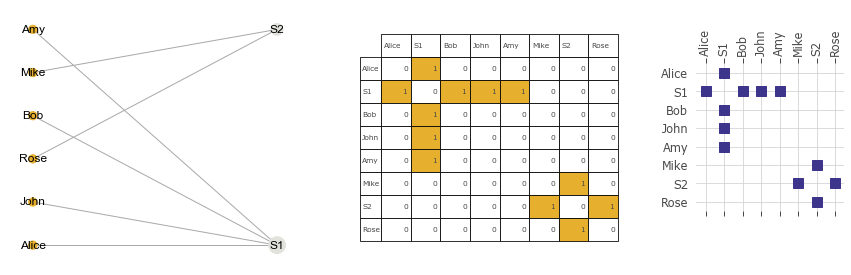

In [17]:
G_bip = nx.from_edgelist([
  ["Alice","S1"],
  ["Bob","S1"],
  ["John","S1"],
  ["Amy","S1"],
  ["Mike","S2"],
  ["Rose","S2"]
], create_using=nx.Graph())

plot_network_adj(G_bip)

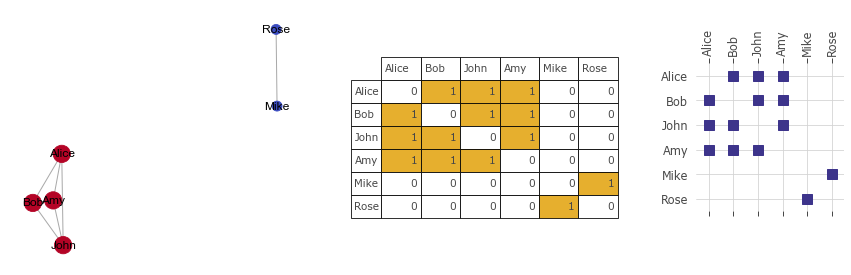

In [18]:
# Project (easy option)
G_proj = nx.bipartite.projected_graph(G_bip, ["Alice","Bob","John","Amy","Mike","Rose"])
plot_network_adj(G_proj)

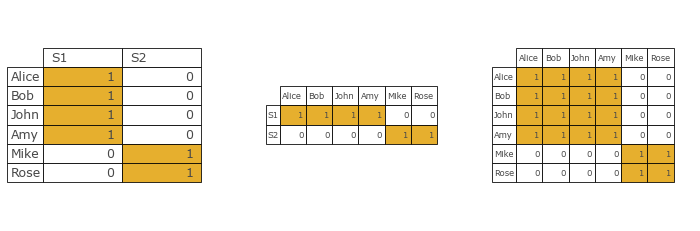

In [19]:
# Extract the two submatrixes
A = nx.to_scipy_sparse_array(G_bip, nodelist=["Alice","Bob","John","Amy","Mike","Rose","S1","S2"])

A_people = A[:6,:][:,-2:]
A_school = A_people.T

plt.figure(figsize=(12,4))
a1 = plt.subplot(131)
plot_table(a1, A_people.todense(), ["Alice","Bob","John","Amy","Mike","Rose"], ["S1","S2"])
a2 = plt.subplot(132)
plot_table(a2, A_school.todense(),  ["S1","S2"], ["Alice","Bob","John","Amy","Mike","Rose"])
a3 = plt.subplot(133)
plot_table(a3, (A_people @ A_school).todense(),  ["Alice","Bob","John","Amy","Mike","Rose"], ["Alice","Bob","John","Amy","Mike","Rose"])


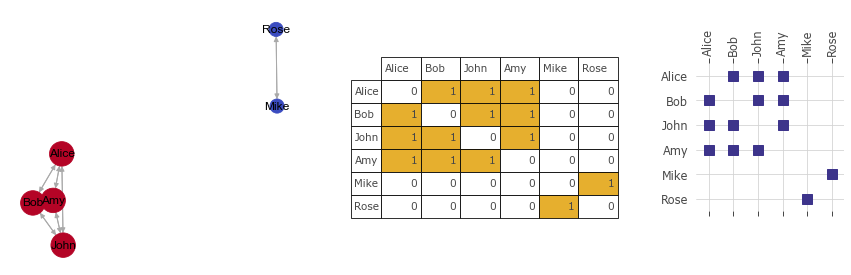

In [20]:
# Proyect via multiplication
G_proj = adj_to_net(A_people @ A_school)
G_proj.remove_edges_from(nx.selfloop_edges(G_proj))


plot_network_adj(G_proj)

In [117]:
## Homophilic? 

# global value
nx.set_node_attributes(G_proj, dict(zip(G_proj.nodes(), A_classmate_to_incomes)), "income")
global_assort = nx.assortativity.numeric_assortativity_coefficient(G_proj, "income")
print(global_assort)

# local, defined in common_functions (based on Peel et al 2018)
local_assort = calculate_local_assort(G_proj, A_classmate_to_incomes)
print(np.round(local_assort,3))

0.9983050586295645
[ 0.074  0.075  0.076  0.076  0.077  0.078  0.079  0.079  0.08   0.081
 -0.    -0.    -0.    -0.    -0.    -0.    -0.    -0.    -0.    -0.
  0.081  0.08   0.079  0.079  0.078  0.077  0.076  0.076  0.075  0.074]


# Exercise 6
- Eigenvector (even more advanced)


['Alice', 'Bob', 'John', 'Amy', 'Mike', 'Rose']
[0.48666426 0.32444284 0.64888568 0.16222142 0.32444284 0.32444284]


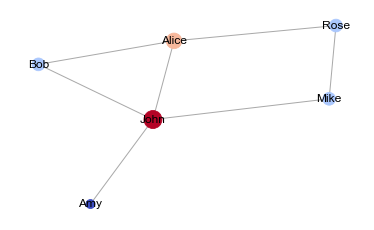

['Alice', 'Bob', 'John', 'Amy', 'Mike', 'Rose']
[0.50196464 0.43921906 0.50196464 0.25098232 0.37647348 0.3137279 ]


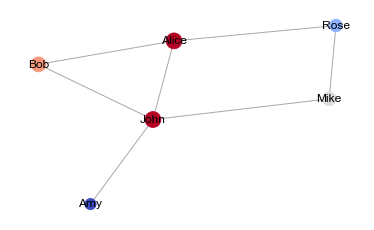

['Alice', 'Bob', 'John', 'Amy', 'Mike', 'Rose']
[0.48365083 0.38692067 0.60456354 0.19346033 0.31437304 0.33855558]


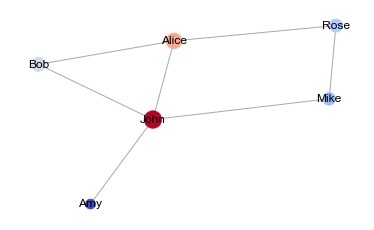

['Alice', 'Bob', 'John', 'Amy', 'Mike', 'Rose']
[0.51212115 0.41900822 0.53074374 0.23278234 0.36314046 0.30727269]


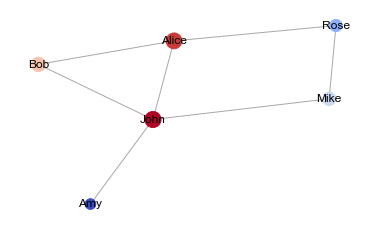

['Alice', 'Bob', 'John', 'Amy', 'Mike', 'Rose']
[0.483843   0.40141049 0.58777964 0.20428927 0.322562   0.33689809]


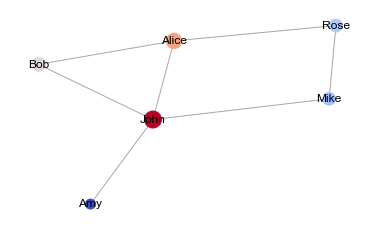

[('Alice', 0.49816568565363206), ('Bob', 0.40845488054415907), ('John', 0.5634381194270055), ('Amy', 0.21678431148030036), ('Mike', 0.3410115867353848), ('Rose', 0.3228756816201712)]


{'Alice': 0.49816562620567956,
 'Bob': 0.4084543148167931,
 'John': 0.563437771403002,
 'Amy': 0.21678389847563684,
 'Mike': 0.3410123357350908,
 'Rose': 0.32287658256564244}

In [21]:
# Eigenvector centrality, manually
N = len(G_undir)
A = nx.to_numpy_array(G_undir)

weight = np.ones(N)
for i in range(100):
    # calculate power
    weight =  weight @ A

    # normalize uwing the geometrical mean
    weight = weight / np.sqrt(np.sum(weight**2))
    
    if i < 5:
        print(G_undir.nodes())
        print(weight)

        plot_network(G_undir, None, values = weight)
        plt.show()

        
print(list(zip(G_undir.nodes(), weight)))

nx.eigenvector_centrality(G_undir)

In [22]:
# PAgerank centrality, manually
N = len(G_dir)
A = nx.to_numpy_array(G_dir)

## Row normalize matrix
# construct diagonal inverse degree matrix
degree = A.sum(1)
D = np.diag(1./degree, 0)
# construct transition matrix (row normalised adjacency matrix)
A_hat = (D @ A)

A_hat = 0.85*A_hat + 0.15/N

weight = np.ones(N)/N
for i in range(1000):
    # calculate power
    weight = weight @ (0.85*A_hat + 0.15/N)
    
# normalize uwing the geometrical mean
weight = weight / np.sqrt(np.sum(weight**2))

print(list(zip(G_dir.nodes(), weight)))

#A 
nx.eigenvector_centrality(G_dir)

[('Alice', 0.5996795853041891), ('Bob', 0.5263896607300096), ('John', 0.5743577477520203), ('Amy', 0.09312116034773292), ('Mike', 0.09312116034773292), ('Rose', 0.12676117952335145)]


{'Alice': 0.5773514097255836,
 'Bob': 0.577350701804791,
 'John': 0.5773486960292118,
 'Amy': 1.179867987789124e-07,
 'Mike': 1.179867987789124e-07,
 'Rose': 2.5957095731360723e-06}